# Statistical Analysis Project
## Part 4 -  Bootstrap
#### Adi Hatav and Tamar Dufour Dror

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statistics
import random

### Linear Regression

#### In this section, we will analyze the effect of depression, fried potato consumption and BMI on the respondents green vegetables consumption (as in part 3)


In [2]:
df = pd.read_csv('CVD_cleaned.csv')
df["Depression"] = df["Depression"].replace({'No':-1, 'Yes':1})
np.random.seed(101)
df_sample = df.sample(n=200)

def r(float):
    return(round(float, 3))

def linear_reg(df):
    X = df[["FriedPotato_Consumption", "BMI", "Depression"]].to_numpy()
    X = np.c_[np.ones(X.shape[0]), X]
    XTX_inverse = np.linalg.inv(np.matmul(X.T, X))
    y = df["Green_Vegetables_Consumption"].to_numpy()
    XTy = np.matmul(X.T, y)
    return (np.matmul(XTX_inverse,XTy))
    

#### Calculating confidence intervals for regression coefficients:<br>
Beta 1 is the coefficient of the fried potato consumption variable.<br>
Beta 2 is the coefficient of the BMI variable.<br>
Beta 3 is the coefficient of the depression variable.

In [3]:
beta_estimate = linear_reg(df_sample)

print("Beta 0: ",r(beta_estimate[0]))
print("Beta 1: ", r(beta_estimate[1]))
print("Beta 2: ", r(beta_estimate[2]))
print("Beta 3: ", r(beta_estimate[3]))

Beta 0:  20.817
Beta 1:  0.015
Beta 2:  -0.26
Beta 3:  -1.484


confidence intervals based on the normal normal - approximatiom,when the estimator to the s.e based on the variance matrix:<br>
$[\hat{\beta_j}-z_{\alpha/2}\hat{s.e}(\hat{\beta_j}),\hat{\beta_j}+z_{\alpha/2}\hat{s.e}(\hat{\beta_j})]$<br>
$\hat{s.e}(\hat{\beta_j})  = \sqrt{\hat{\sigma_{\epsilon}}^2C_{jj}}$

In [4]:
X = df[["FriedPotato_Consumption", "BMI", "Depression"]].to_numpy()
X = np.c_[np.ones(X.shape[0]), X]
XTX_inverse = np.linalg.inv(np.matmul(X.T, X))
y = df["Green_Vegetables_Consumption"].to_numpy()

y_estimate = np.matmul(X, beta_estimate)
n = y.shape[0]
p = 4
e = y - y_estimate
noise_var = 1/(n-p)*sum(i**2 for i in e)
C = XTX_inverse
z_0975 = z = stats.norm.ppf(0.975)

for i in range(p):
    lower = beta_estimate[i]-z*(noise_var*C[i][i])**0.5
    upper = beta_estimate[i]+z*(noise_var*C[i][i])**0.5
    print("95% confidence interval for beta",i," : [",r(lower), ",",r(upper),"]")
    print("length: ",r(abs(upper-lower)))

95% confidence interval for beta 0  : [ 20.57 , 21.064 ]
length:  0.495
95% confidence interval for beta 1  : [ 0.009 , 0.021 ]
length:  0.012
95% confidence interval for beta 2  : [ -0.268 , -0.252 ]
length:  0.016
95% confidence interval for beta 3  : [ -1.55 , -1.417 ]
length:  0.132


Confidence intervals based on the normal normal - approximatiom, when the estimator to the s.e is bootstrap estimator:<br>
$[\hat{\beta_j}-z_{\alpha/2}\hat{s.e}_{boot}(\hat{\beta_j}),\hat{\beta_j}+z_{\alpha/2}\hat{s.e}_{boot}(\hat{\beta_j})]$<br>

Bootstrap pivot confidence intervals:<br>
$[2\hat{\beta_j}-\hat{\beta_{j,1-\alpha/2}^{boot}}, 2\hat{\beta_j}-\hat{\beta_{j,\alpha/2}^{boot}}]$<br>

Bootstrap precentile confidence intervals:<br>
$[\hat{\beta_{j,\alpha/2}^{boot}}, \hat{\beta_{j,1-\alpha/2}^{boot}}]$<br>

In [5]:
B = 400
beta_list = [0,1,2,3]
beta_boots = {key: [] for key in beta_list}

for i in range(B):
    boot_sample = df_sample.sample(n=200, replace=True).copy()
    beta_estimate = linear_reg(boot_sample)
    for j in range (p):
        beta_boots[j].append(beta_estimate[j])

for i in range(p):
    std = np.array(beta_boots[i]).std()
    upper_noraml = beta_estimate[i]+z*(std)
    lower_normal = beta_estimate[i]-z*(std)
    print("95% confidence interval, based on normal - approximatiom, for beta",i," : [", r(lower_normal), ", ", r(upper_noraml),"]")
    print("length: ",r(abs(upper_noraml-lower_normal)))
    
    beta_boots_i = np.array(beta_boots[i])
    beta_boots_q0975 = np.quantile(beta_boots_i, q=0.975)
    beta_boots_q0025 = np.quantile(beta_boots_i, q=0.025)
    upper_pivot = 2*beta_estimate[i] - beta_boots_q0025
    lower_pivot = 2*beta_estimate[i] - beta_boots_q0975
    print("95% confidence interval, based on pivot, for beta",i," : [", r(lower_pivot), ", ", r(upper_pivot),"]")
    print("length: ",abs(upper_pivot-lower_pivot))
    
    print("95% confidence interval, based on quantiles, for beta",i," : [", r(beta_boots_q0025), ", ", r(beta_boots_q0975),"]")
    print("length: ",r(abs(beta_boots_q0975-beta_boots_q0025)))
    
    print("--------------------------------------------------------------------------------------------------------------")

    



95% confidence interval, based on normal - approximatiom, for beta 0  : [ 10.084 ,  29.285 ]
length:  19.2
95% confidence interval, based on pivot, for beta 0  : [ 6.842 ,  27.269 ]
length:  20.4272266480371
95% confidence interval, based on quantiles, for beta 0  : [ 12.1 ,  32.527 ]
length:  20.427
--------------------------------------------------------------------------------------------------------------
95% confidence interval, based on normal - approximatiom, for beta 1  : [ -0.176 ,  0.271 ]
length:  0.446
95% confidence interval, based on pivot, for beta 1  : [ -0.148 ,  0.293 ]
length:  0.44117880837499013
95% confidence interval, based on quantiles, for beta 1  : [ -0.198 ,  0.243 ]
length:  0.441
--------------------------------------------------------------------------------------------------------------
95% confidence interval, based on normal - approximatiom, for beta 2  : [ -0.59 ,  0.04 ]
length:  0.63
95% confidence interval, based on pivot, for beta 2  : [ -0.574 ,  

### Tests
#### In this section, we will analyze the effect of depression on the respondents weight, among women aged 18-64.
Let $F_X(x)$ be the CDF of the weight of women who not reported being depressed, $\mathbb{E}[X] = \mu_1$, <br> 
and let $F_Y(y)$ be the CDF of the weight of women who reported being depressed,  $\mathbb{E}[Y] = \mu_2$. <br>
$\delta = \mu_2-\mu_1$ (MLE)

$H_0: F_X(x) = F_Y(y)$<br>
$H_1: F_X(x) \prec F_Y(y)$

In [6]:
np.random.seed(102)
ages_catrgories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']
women_df = df[df["Age_Category"].isin(ages_catrgories)]
women_df = women_df[women_df["Sex"]=="Female"]
sample = women_df.sample(n=200)

In [7]:
smaple_d = sample[sample["Depression"]==1]
smaple_nd = sample[sample["Depression"]==-1]
mu_1_est = smaple_nd["Weight_(kg)"].mean()
mu_2_est = smaple_d["Weight_(kg)"].mean()
delta_est = mu_2_est-mu_1_est
print("Estimator for mu 1: ",r(mu_1_est))
print("Estimator for mu 2: ",r(mu_2_est))
print("Estimator for delta: ",r(delta_est))

Estimator for mu 1:  75.417
Estimator for mu 2:  85.922
Estimator for delta:  10.505


In [8]:
N = 1000
delta_boot = []
for i in range(N):
    boot_d = smaple_d.sample(n=200, replace=True)["Weight_(kg)"].mean()
    boot_nd = smaple_nd.sample(n=200, replace=True)["Weight_(kg)"].mean()
    diff = boot_d - boot_nd
    delta_boot.append(diff)
    
delta_boot = np.array(delta_boot)
delta_boot_q0975 = np.quantile(delta_boot, q=0.975)
delta_boots_q0025 = np.quantile(delta_boot, q=0.025)

print("95% confidence interval, based on precentiles, for delta"" : [", r(delta_boots_q0025), ",", r(delta_boot_q0975),"]")

95% confidence interval, based on precentiles, for delta : [ 6.112 , 14.947 ]


In [9]:
deprresed_mean = women_df[women_df["Depression"]==1]["Weight_(kg)"].mean()
non_deprresed_mean = women_df[women_df["Depression"]==-1]["Weight_(kg)"].mean()
delta_all = deprresed_mean - non_deprresed_mean
print("Estimator for delta according to the full database: ", r(delta_all))


Estimator for delta according to the full database:  6.441


Wald's test:<br>
$H_0:\delta = 0$<br>
$H_1:\delta>0$<br>
$T.S: T = \frac{\bar{Y_m}-\bar{X_n}}{\sqrt{\frac{\sigma_X^2}{n}+\frac{\sigma_Y^2}{m}}}$<br>
$R.R: T>z_{\alpha/2}$

In [10]:
deprresed_var = women_df[women_df["Depression"]==1]["Weight_(kg)"].var()
n = women_df[women_df["Depression"]==1]["Weight_(kg)"].shape[0]
non_deprresed_var = women_df[women_df["Depression"]==-1]["Weight_(kg)"].var()
m = women_df[women_df["Depression"]==-1]["Weight_(kg)"].shape[0]

T = (deprresed_mean - non_deprresed_mean)/((deprresed_var/n)+(non_deprresed_var/m))**0.5
z = stats.norm.ppf(0.025)

print("Wald's statistic: ", r(T))
rejection = (T>z)
print("Recject H0: " , rejection)

Wald's statistic:  42.302
Recject H0:  True


Permutation test:<br>
$H_0: F_X(x) = F_Y(y)$<br>
$H_1: F_X(x) \prec F_Y(y)$<br>
$T.S: T =\bar{Y_m}-\bar{X_n}$<br>
$p-value : P_0(T>t_{obs})$<br>
$t_{obs}$ = the observed value of the test statistic

In [11]:
d_num = sample[sample["Depression"]==1][["Weight_(kg)"]].count()[0]
T_obs = women_df[women_df["Depression"]==1]["Weight_(kg)"].mean()- women_df[women_df["Depression"]==-1]["Weight_(kg)"].mean()
Indicator = 0
for i in range(B):
    dep_index=  random.sample(range(200), d_num)
    nd_index = [i for i in range(200) if i not in dep_index]
    delta = (sample.iloc[dep_index, :][["Weight_(kg)"]].mean()) - (sample.iloc[nd_index, :][["Weight_(kg)"]].mean())
    if T_obs<=delta[0]:
        Indicator+=1

p_value = Indicator/B
p_value

0.03

Therefore, the null hypothesis is rejected of every  significance level above 0.03.

Let $m_1$ be the mediam of the weight of women who not reported being depressed, <br> 
and let $m_2$ be the mediam of the weight of women who reported being depressed. <br>
$\delta = m_2-m_1$

In [12]:
d_median = smaple_d["Weight_(kg)"].median()
nd_median = smaple_nd["Weight_(kg)"].median()
delta_medians = d_median-nd_median
print("Estimator for the median weight of depressed woman: ",r(d_median))
print("Estimator for the median weight of non-depressed woman: ", r(nd_median))
print("Estimator for delta: ", r(delta_medians))

Estimator for the median weight of depressed woman:  77.335
Estimator for the median weight of non-depressed woman:  72.57
Estimator for delta:  4.765


In [13]:
N = 1000
delta_boot_medians = []
for i in range(N):
    boot_d = smaple_d.sample(n=200, replace=True)["Weight_(kg)"].median()
    boot_nd = smaple_nd.sample(n=200, replace=True)["Weight_(kg)"].median()
    diff = boot_d - boot_nd
    delta_boot_medians.append(diff)
    
delta_boot_medians = np.array(delta_boot_medians)
delta_boot_q0975 = np.quantile(delta_boot_medians, q=0.975)
delta_boots_q0025 = np.quantile(delta_boot_medians, q=0.025)

print("95% confidence interval, based on precentiles, for delta"" : [", r(delta_boots_q0025), ", ", r(delta_boot_q0975),"]")

95% confidence interval, based on precentiles, for delta : [ 2.27 ,  12.025 ]


In [14]:
deprresed_med = women_df[women_df["Depression"]==1]["Weight_(kg)"].median()
non_deprresed_med = women_df[women_df["Depression"]==-1]["Weight_(kg)"].median()
delta_all_med = deprresed_mean - non_deprresed_mean
print("Estimator for delta according to the full database:", r(delta_all_med))

Estimator for delta according to the full database: 6.441


Permutation test:<br>
$H_0: F_X(x) = F_Y(y)$<br>
$H_1: F_X(x) \prec F_Y(y)$<br>
$T.S: T = M_y-M_x$<br>
$R.R: p-value <\alpha$

In [15]:
d_num = sample[sample["Depression"]==1][["Weight_(kg)"]].count()[0]
W_obs = women_df[women_df["Depression"]==1]["Weight_(kg)"].median()- women_df[women_df["Depression"]==-1]["Weight_(kg)"].median()
Indicator_med = 0
for i in range(B):
    dep_index=  random.sample(range(200), d_num)
    nd_index = [i for i in range(200) if i not in dep_index]
    med1 = sample.iloc[dep_index, :][["Weight_(kg)"]].median()
    med2 = sample.iloc[nd_index, :][["Weight_(kg)"]].median()
    delta = med1-med2
    if W_obs<=delta[0]:
        Indicator_med+=1

p_value_med = Indicator/B
p_value_med

0.03

Therefore, the null hypothesis is rejected of every significance level of above 0.03.

Permutation test:<br>
$H_0: F_X(x) = F_Y(y)$<br>
$H_1: F_X(x) \prec F_Y(y)$<br>
$T.S: T = \sum \limits _{i=1} ^{n} S_i, \quad  S_i$ = the rank of the i observation in the depression category<br>
$R.R: p-value <\alpha$

In [16]:
sample_rank=0
sample_sorted = sample.sort_values("Weight_(kg)", ascending = False)
for i in range(200):
    if sample_sorted.iloc[i]["Depression"]==1:
        sample_rank+=i

T=0
for j in range(B):
    boot_sample = sample.sample(n=200, replace=True)
    sample1 = boot_sample.sort_values("Weight_(kg)")
    s1 = 0
    for i in range(200):
        if sample1.iloc[i]["Depression"]==1:
            s1+=i
    if s1<sample_rank:
        T+=1
pvalue = T/B
pvalue

0.015

Therefore, the null hypothesis is rejected of every  significance level above 0.015.

examine whether we can use a normal approximation:

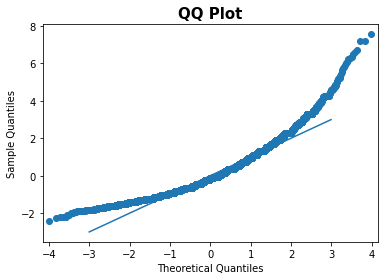

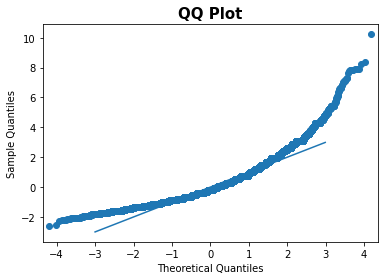

In [17]:
import statsmodels.api as sm
import pylab as py

dep = women_df[women_df["Depression"]==1]["Weight_(kg)"]
non_dep = women_df[women_df["Depression"]==-1]["Weight_(kg)"]
sm.qqplot(dep, fit=True)
plt.plot(np.arange(-3,3,0.01), np.arange(-3,3,0.01))
plt.title("QQ Plot", fontweight = "bold", fontsize = 15)
plt.show()

sm.qqplot(non_dep, fit = True)
plt.plot(np.arange(-3,3,0.01), np.arange(-3,3,0.01))
plt.title("QQ Plot", fontweight = "bold", fontsize = 15)
plt.show()

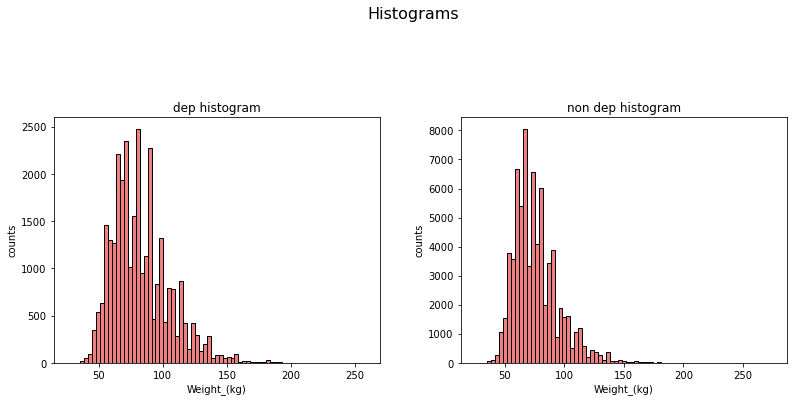

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Histograms', fontsize=16)
fig.tight_layout(pad=5.0) 
axs[0].hist(dep, bins=75, ec="black", color="lightcoral")
axs[0].set(ylabel="counts", xlabel= "Weight_(kg)", title= "dep histogram")
axs[1].hist(non_dep, bins=75, ec="black", color="lightcoral")
axs[1].set(ylabel="counts", xlabel= "Weight_(kg)", title="non dep histogram")

plt.show()